# Basic data cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
clicks=pd.read_csv('clicks.csv')
hotel_details=pd.read_csv('hotel_details.csv')
hotel_metrics=pd.read_csv('hotel_metrics.csv')

In [3]:
clicks.head()

date_ymd  click_count
0  20190101        19712
1  20190102        22632
2  20190103        22579
3  20190104        20716
4  20190105        21953

In [4]:
# transform dates to propper timestamps
def transformer(x):
    x=str(x)
    x=pd.to_datetime(x[0:4]+'-'+x[4:6]+'-'+x[6:])
    return x

clicks.index=clicks.date_ymd.apply(transformer)
clicks.drop(columns='date_ymd',inplace=True)

clicks.head()

click_count
date_ymd               
2019-01-01        19712
2019-01-02        22632
2019-01-03        22579
2019-01-04        20716
2019-01-05        21953

In [5]:
hotel_details.head()

hotel_id            city  country  stars hotel_rating
0   3202221  Rio de Janeiro   Brazil      0           \N
1   3826522           Hanoi  Vietnam      0         88.8
2   5433480  Rio de Janeiro   Brazil      0        81.66
3   6100572           Miami      USA      4        84.93
4     41209       Stockholm   Sweden      4        81.93

In [6]:
#to numeric column - ranking 
hotel_details.hotel_rating=pd.to_numeric(hotel_details.hotel_rating, errors='coerce')

In [7]:
hotel_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1524 entries, 0 to 1523
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hotel_id      1524 non-null   int64  
 1   city          1524 non-null   object 
 2   country       1524 non-null   object 
 3   stars         1524 non-null   int64  
 4   hotel_rating  1380 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 59.7+ KB


In [8]:
# transform dates to propper timestamps
hotel_metrics.index=hotel_metrics.date_ymd.apply(transformer)
hotel_metrics.drop(columns='date_ymd',inplace=True)

hotel_metrics.head()

hotel_id  impression_count  click_count  booking_count  avg_cpc  \
date_ymd                                                                      
2019-08-02      7940              1931           16              0     0.93   
2019-08-10      7940               931           27              0     1.46   
2019-08-01      7940              1254           27              1     1.15   
2019-08-07      7940              1614           36              0     1.19   
2019-08-06      7940              1748           27              0     1.26   

            avg_clicked_price  avg_length_of_stay  avg_time_to_travel  
date_ymd                                                               
2019-08-02             168.87                1.63               23.25  
2019-08-10             157.94                1.70               22.22  
2019-08-01             194.48                1.78               18.52  
2019-08-07             170.31                2.06               23.50  
2019-08-06             170.61                1.70               21.00

In [9]:
hotel_metrics.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9720 entries, 2019-08-02 to 2019-08-03
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   hotel_id            9720 non-null   int64  
 1   impression_count    9720 non-null   int64  
 2   click_count         9720 non-null   int64  
 3   booking_count       9720 non-null   int64  
 4   avg_cpc             9720 non-null   float64
 5   avg_clicked_price   9720 non-null   float64
 6   avg_length_of_stay  9720 non-null   float64
 7   avg_time_to_travel  9720 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 683.4 KB


# Part 1 - Data observation

## Representativness of each country on our platform + check duplicates

In [10]:
hotel_details.groupby(['country']).agg({"hotel_id": ['nunique', 'count']})

hotel_id      
         nunique count
country               
Brazil       258   258
Sweden       144   144
USA          812   812
Vietnam      148   148
unknown      162   162

## Distribution of hotel stars within each country in % to total number of hotels in each country

In [11]:
(((hotel_details.groupby(['country','stars'])[['stars']].count()/hotel_details.groupby(['country'])[['stars']].count())*100).apply(round)).unstack('stars')

stars                             
stars       0    1     2     3     4     5
country                                   
Brazil   33.0  2.0   6.0  25.0  26.0   9.0
Sweden   20.0  1.0  10.0  24.0  40.0   6.0
USA      22.0  2.0  15.0  31.0  25.0   6.0
Vietnam  18.0  1.0  12.0  39.0  18.0  14.0
unknown  19.0  2.0  13.0  28.0  31.0   6.0

## Distribution of unkown-rating-hotels by countries - relative to total number of hotels in each country


In [12]:
((hotel_details[hotel_details.hotel_rating.isnull()].groupby('country').hotel_id.count()/\
hotel_details.groupby('country').hotel_id.count())*100).round()

country
Brazil     16.0
Sweden      1.0
USA         9.0
Vietnam     7.0
unknown    10.0
Name: hotel_id, dtype: float64

## Average number of stars and ranking for each city

In [13]:
hotel_details.groupby(['city'])[['stars','hotel_rating']].mean()

stars  hotel_rating
city                                  
Hanoi           2.783784     83.759275
Los Angeles     1.947917     75.303416
Miami           2.397260     78.783282
New York        2.813953     81.639955
Rio de Janeiro  2.368217     80.002581
Stockholm       2.772414     80.827222
unknown         2.697531     79.481310

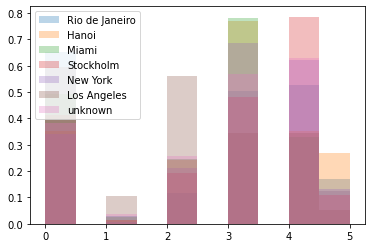

In [14]:
for i in hotel_details.city.drop_duplicates():
    plt.hist(hotel_details[hotel_details.city==i].stars,density=True,label=i,alpha=0.3)

plt.legend()
plt.show()

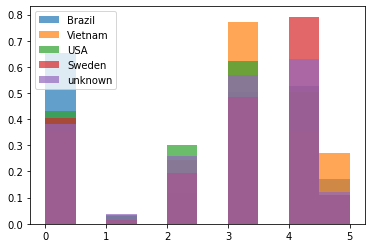

In [15]:
for i in hotel_details.country.drop_duplicates():
    plt.hist(hotel_details[hotel_details.country==i].stars,density=True,label=i,alpha=0.7)

plt.legend()
plt.show()

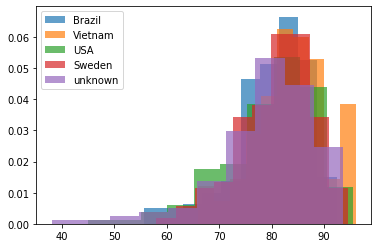

In [16]:
for i in hotel_details.country.drop_duplicates():
    plt.hist(hotel_details[hotel_details.country==i].hotel_rating,density=True,label=i,alpha=0.7)

plt.legend()
plt.show()

## Relationshp between hotels' stars and website rating

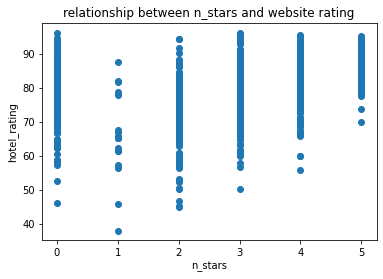

In [17]:
plt.scatter(hotel_details.stars,hotel_details.hotel_rating)
plt.ylabel('hotel_rating')
plt.xlabel('n_stars')
plt.title('relationship between n_stars and website rating')
plt.show()

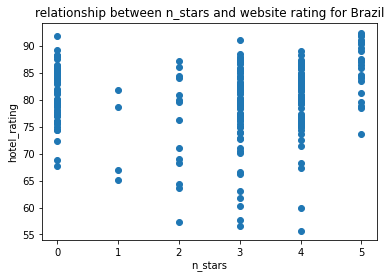

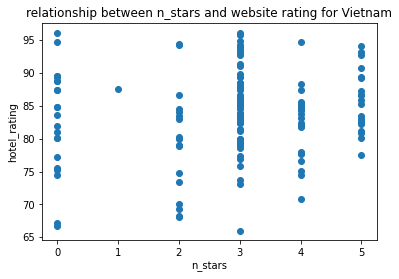

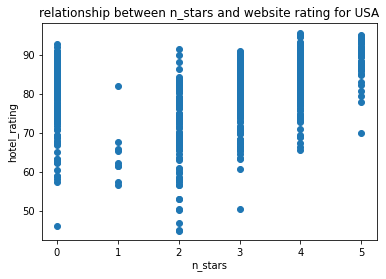

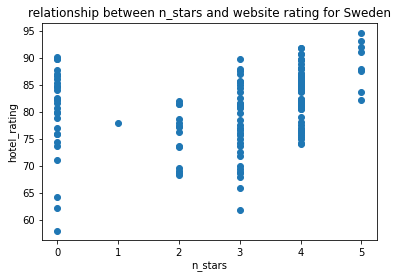

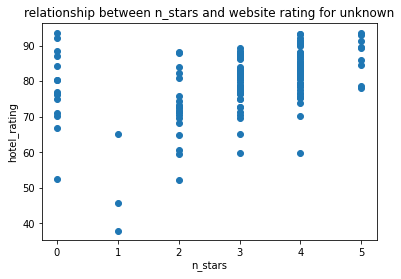

In [18]:
for i in hotel_details.country.drop_duplicates():

    plt.scatter(hotel_details[hotel_details.country==i].stars,
                hotel_details[hotel_details.country==i].hotel_rating,
                label=i)
    
    plt.ylabel('hotel_rating')
    plt.xlabel('n_stars')
    plt.title('relationship between n_stars and website rating for '+i)
    plt.show()



## Correlation matrix for aggregated metrics & hotels' rating and stars

In [19]:
# aggregate metrics
avg_metrics=hotel_metrics.groupby('hotel_id', as_index=False).mean()

# add raitings
avg_metrics=avg_metrics.merge(hotel_details[['hotel_id','stars','hotel_rating']],on='hotel_id')

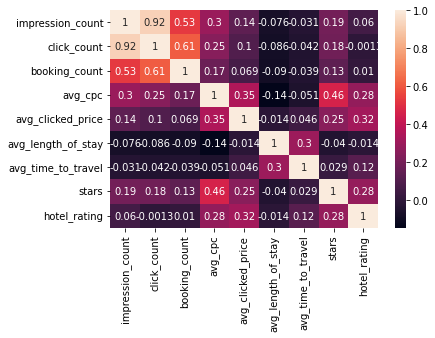

In [20]:
corrMatrix = avg_metrics.drop(columns=['hotel_id']).corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

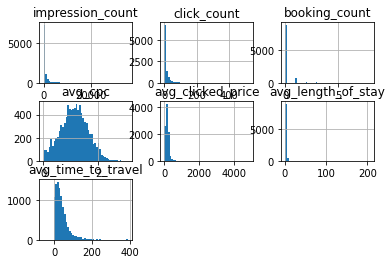

In [21]:
hotel_metrics.drop(columns=['hotel_id']).hist(bins=50);

# Part 2 - timeseries forecast

In [15]:
import warnings
warnings.filterwarnings("ignore")

(242, 1)


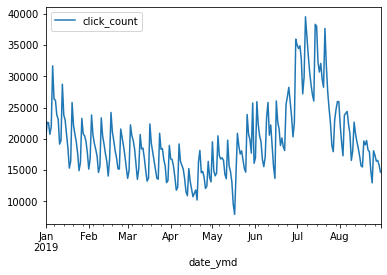

In [23]:
clicks.plot();
print(clicks.shape)

## We can observe seasonality and ideally our model must account for it -- BUT unfortunatelly we are not given entire yearly cycle -> we work with what we have =(

## ACF and PACF

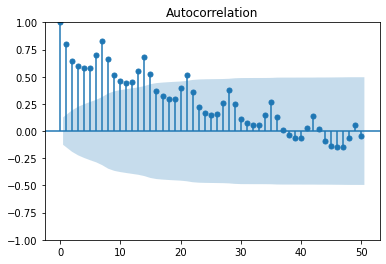

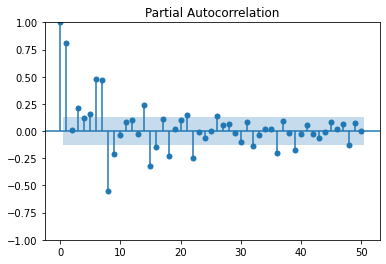

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(clicks, lags=50);
plot_pacf(clicks, lags=50);

In [25]:
set(clicks.index.month)

{1, 2, 3, 4, 5, 6, 7, 8}

## Grid search - ARIMA - test set - AUGUST

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima(X, arima_order):
    # prepare training dataset
    train=clicks[clicks.index.month!=8]
    test=clicks[clicks.index.month==8]
    # make predictions
    model = ARIMA(train, order=arima_order)
    model_fit = model.fit()
    predictions = model_fit.forecast(len(test))
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(test, predictions))
    return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def compare_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))


# evaluate parameters
p_values = [1, 7, 14, 21]
d_values = [0, 1, 2, 3]
q_values = [7, 8, 9, 22]
compare_models(clicks, p_values, d_values, q_values)

In [16]:
# retrain for nice vizualization
train=clicks[clicks.index.month!=8]
test=clicks[clicks.index.month==8]
# make predictions
model = ARIMA(train, order=(14, 3, 8))
model_fit = model.fit()
predictions = model_fit.forecast(len(test))

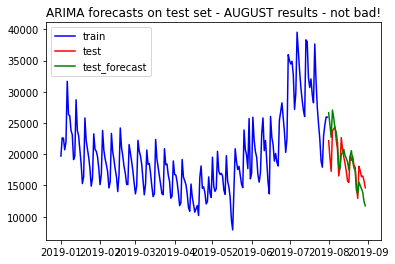

In [17]:
# nice vizualization
plt.plot(train, color='blue',label='train')
plt.plot(test, color='red', label='test')
plt.plot(predictions, color='green', label='test_forecast')
plt.legend()
plt.title('ARIMA forecasts on test set - AUGUST results - not bad!')
plt.show()

## Best ARIMA(14, 3, 8) RMSE=2393.119 -- retrain on entire dataset & get forecast on September

In [18]:
final_ARIMA=ARIMA(clicks, order=(14, 3, 8))
final_ARIMA_fit = final_ARIMA.fit()
final_predictions = final_ARIMA_fit.forecast(31)

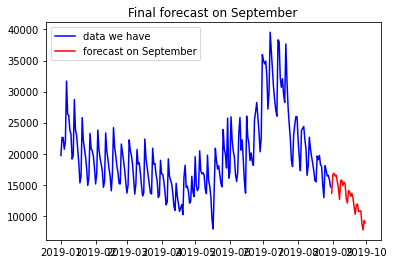

final predictions
2019-08-31    13647.406083
2019-09-01    16617.782398
2019-09-02    16870.312483
2019-09-03    16416.722182
2019-09-04    16552.053544
2019-09-05    15497.487459
2019-09-06    14439.141270
2019-09-07    12636.596765
2019-09-08    15704.767672
2019-09-09    15750.452573
2019-09-10    14876.719737
2019-09-11    15439.983520
2019-09-12    15075.541897
2019-09-13    12797.074250
2019-09-14    12067.073896
2019-09-15    14059.697800
2019-09-16    13850.448895
2019-09-17    13149.715543
2019-09-18    13623.958031
2019-09-19    12879.604056
2019-09-20    11483.932578
2019-09-21    10250.397098
2019-09-22    11736.781079
2019-09-23    11904.838064
2019-09-24    10720.319157
2019-09-25    10751.648188
2019-09-26    10809.714020
2019-09-27     8730.396826
2019-09-28     7735.630053
2019-09-29     9254.273623
2019-09-30     8873.976368
Freq: D, Name: predicted_mean, dtype: float64


In [19]:
# nice vizualization
plt.plot(clicks, color='blue',label='data we have')
plt.plot(final_predictions, color='red', label='forecast on September')
plt.legend()
plt.title('Final forecast on September')
plt.show()
print('final predictions')
print(final_predictions)

In [198]:
final_predictions.to_csv('II_TS_forecast_clicks.csv')

# Part 3 - Country classification for the unlabeled hotels 

## Feature engineering 

DatetimeIndex(['2019-08-01', '2019-08-02', '2019-08-03', '2019-08-04',
               '2019-08-05', '2019-08-06', '2019-08-07', '2019-08-08',
               '2019-08-09', '2019-08-10'],
              dtype='datetime64[ns]', name='date_ymd', freq=None)


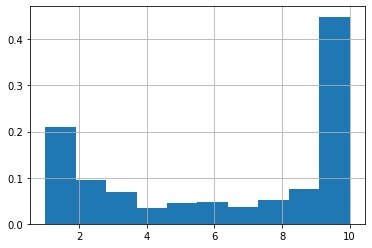

In [22]:
# let's check if each hotel has complete temporal data in hotel_metrics
print(hotel_metrics.index.drop_duplicates().sort_values())

# most of the hotels do not have metrics for each of 10 days of August - we are gonna use that fact
(hotel_metrics.groupby('hotel_id').hotel_id.count()).hist(bins=10,density=True);

## Include info on weekdays -- we mark the hotels that did not have any activities on Satuardays and Sundays

In [28]:
df=hotel_metrics.copy()

import datetime
df['weekday']=hotel_metrics.index.map(datetime.datetime.weekday)
df.head()

hotel_id  impression_count  click_count  booking_count  avg_cpc  \
date_ymd                                                                      
2019-08-02      7940              1931           16              0     0.93   
2019-08-10      7940               931           27              0     1.46   
2019-08-01      7940              1254           27              1     1.15   
2019-08-07      7940              1614           36              0     1.19   
2019-08-06      7940              1748           27              0     1.26   

            avg_clicked_price  avg_length_of_stay  avg_time_to_travel  weekday  
date_ymd                                                                        
2019-08-02             168.87                1.63               23.25        4  
2019-08-10             157.94                1.70               22.22        5  
2019-08-01             194.48                1.78               18.52        3  
2019-08-07             170.31                2.06               23.50        2  
2019-08-06             170.61                1.70               21.00        1

In [29]:
# get dummies for weekdays
df=pd.get_dummies(df, prefix_sep='_', dummy_na=False, columns=['weekday'])
df.head()

hotel_id  impression_count  click_count  booking_count  avg_cpc  \
date_ymd                                                                      
2019-08-02      7940              1931           16              0     0.93   
2019-08-10      7940               931           27              0     1.46   
2019-08-01      7940              1254           27              1     1.15   
2019-08-07      7940              1614           36              0     1.19   
2019-08-06      7940              1748           27              0     1.26   

            avg_clicked_price  avg_length_of_stay  avg_time_to_travel  \
date_ymd                                                                
2019-08-02             168.87                1.63               23.25   
2019-08-10             157.94                1.70               22.22   
2019-08-01             194.48                1.78               18.52   
2019-08-07             170.31                2.06               23.50   
2019-08-06             170.61                1.70               21.00   

            weekday_0  weekday_1  weekday_2  weekday_3  weekday_4  weekday_5  \
date_ymd                                                                       
2019-08-02          0          0          0          0          1          0   
2019-08-10          0          0          0          0          0          1   
2019-08-01          0          0          0          1          0          0   
2019-08-07          0          0          1          0          0          0   
2019-08-06          0          1          0          0          0          0   

            weekday_6  
date_ymd               
2019-08-02          0  
2019-08-10          0  
2019-08-01          0  
2019-08-07          0  
2019-08-06          0

In [30]:
df.columns.tolist()

['hotel_id',
 'impression_count',
 'click_count',
 'booking_count',
 'avg_cpc',
 'avg_clicked_price',
 'avg_length_of_stay',
 'avg_time_to_travel',
 'weekday_0',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'weekday_6']

In [31]:
# aggregate metrics by hotels + add info on frequency of hotels' appearence in logs
df=df.groupby('hotel_id').agg({
    
    'hotel_id':'count',
    'impression_count':'mean',
    'click_count':'mean',
    'booking_count':'mean',
    'avg_cpc':'mean',
    'avg_clicked_price':'mean',
    'avg_length_of_stay':'mean',
    'avg_time_to_travel':'mean',
    'weekday_0':'max',
    'weekday_1':'max',
    'weekday_2':'max',
    'weekday_3':'max',
    'weekday_4':'max',
    'weekday_5':'max',
    'weekday_6':'max'
})

df

hotel_id  impression_count  click_count  booking_count   avg_cpc  \
hotel_id                                                                     
7922            10        564.500000     7.700000       0.100000  1.513000   
7923            10        162.100000     4.600000       0.200000  0.842000   
7925            10        298.300000     3.500000       0.000000  1.336000   
7929            10        528.800000    17.900000       0.100000  1.104000   
7930             9        176.666667     3.111111       0.000000  1.273333   
...            ...               ...          ...            ...       ...   
12473506         7          6.000000     1.714286       0.000000  0.705714   
12990876         6         24.333333     1.833333       0.666667  0.771667   
13044172         1         11.000000     1.000000       0.000000  0.050000   
13267400        10        154.800000     8.000000       0.000000  0.518000   
13537168        10        151.300000     5.300000       0.100000  1.422000   

          avg_clicked_price  avg_length_of_stay  avg_time_to_travel  \
hotel_id                                                              
7922             187.425000            1.540000           32.842000   
7923             145.277000            2.205000           15.558000   
7925             173.453000            2.298000           38.420000   
7929             121.544000            2.247000           20.629000   
7930             149.058889            1.900000           15.097778   
...                     ...                 ...                 ...   
12473506         144.522857            3.810000           36.332857   
12990876         184.960000            2.916667           26.750000   
13044172          21.440000            4.000000            4.000000   
13267400         123.798000            2.583000           37.547000   
13537168         245.589000            3.032000           48.750000   

          weekday_0  weekday_1  weekday_2  weekday_3  weekday_4  weekday_5  \
hotel_id                                                                     
7922              1          1          1          1          1          1   
7923              1          1          1          1          1          1   
7925              1          1          1          1          1          1   
7929              1          1          1          1          1          1   
7930              1          1          1          1          1          1   
...             ...        ...        ...        ...        ...        ...   
12473506          1          1          1          1          1          1   
12990876          0          0          1          0          1          1   
13044172          0          0          0          0          1          0   
13267400          1          1          1          1          1          1   
13537168          1          1          1          1          1          1   

          weekday_6  
hotel_id             
7922              1  
7923              1  
7925              1  
7929              1  
7930              1  
...             ...  
12473506          0  
12990876          1  
13044172          0  
13267400          1  
13537168          1  

[1524 rows x 15 columns]

In [32]:
df.columns=['n_total_active_days',
             'avg_impression_count',
             'avg_click_count',
             'avg_booking_count',
             'avg_cpc',
             'avg_clicked_price',
             'avg_length_of_stay',
             'avg_time_to_travel',
             'weekday_0',
             'weekday_1',
             'weekday_2',
             'weekday_3',
             'weekday_4',
             'weekday_5',
             'weekday_6']

In [33]:
# add aditional info from details
df=df.merge(hotel_details,left_index=True, right_on='hotel_id')

In [34]:
df.index=df.hotel_id
df.drop(columns=['hotel_id','city'], inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1524 entries, 7922 to 13537168
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   n_total_active_days   1524 non-null   int64  
 1   avg_impression_count  1524 non-null   float64
 2   avg_click_count       1524 non-null   float64
 3   avg_booking_count     1524 non-null   float64
 4   avg_cpc               1524 non-null   float64
 5   avg_clicked_price     1524 non-null   float64
 6   avg_length_of_stay    1524 non-null   float64
 7   avg_time_to_travel    1524 non-null   float64
 8   weekday_0             1524 non-null   uint8  
 9   weekday_1             1524 non-null   uint8  
 10  weekday_2             1524 non-null   uint8  
 11  weekday_3             1524 non-null   uint8  
 12  weekday_4             1524 non-null   uint8  
 13  weekday_5             1524 non-null   uint8  
 14  weekday_6             1524 non-null   uint8  
 15  country       

In [36]:
df

n_total_active_days  avg_impression_count  avg_click_count  \
hotel_id                                                               
7922                       10            564.500000         7.700000   
7923                       10            162.100000         4.600000   
7925                       10            298.300000         3.500000   
7929                       10            528.800000        17.900000   
7930                        9            176.666667         3.111111   
...                       ...                   ...              ...   
12473506                    7              6.000000         1.714286   
12990876                    6             24.333333         1.833333   
13044172                    1             11.000000         1.000000   
13267400                   10            154.800000         8.000000   
13537168                   10            151.300000         5.300000   

          avg_booking_count   avg_cpc  avg_clicked_price  avg_length_of_stay  \
hotel_id                                                                       
7922               0.100000  1.513000         187.425000            1.540000   
7923               0.200000  0.842000         145.277000            2.205000   
7925               0.000000  1.336000         173.453000            2.298000   
7929               0.100000  1.104000         121.544000            2.247000   
7930               0.000000  1.273333         149.058889            1.900000   
...                     ...       ...                ...                 ...   
12473506           0.000000  0.705714         144.522857            3.810000   
12990876           0.666667  0.771667         184.960000            2.916667   
13044172           0.000000  0.050000          21.440000            4.000000   
13267400           0.000000  0.518000         123.798000            2.583000   
13537168           0.100000  1.422000         245.589000            3.032000   

          avg_time_to_travel  weekday_0  weekday_1  weekday_2  weekday_3  \
hotel_id                                                                   
7922               32.842000          1          1          1          1   
7923               15.558000          1          1          1          1   
7925               38.420000          1          1          1          1   
7929               20.629000          1          1          1          1   
7930               15.097778          1          1          1          1   
...                      ...        ...        ...        ...        ...   
12473506           36.332857          1          1          1          1   
12990876           26.750000          0          0          1          0   
13044172            4.000000          0          0          0          0   
13267400           37.547000          1          1          1          1   
13537168           48.750000          1          1          1          1   

          weekday_4  weekday_5  weekday_6 country  stars  hotel_rating  
hotel_id                                                                
7922              1          1          1     USA      3         77.29  
7923              1          1          1     USA      3         75.96  
7925              1          1          1     USA      3         78.64  
7929              1          1          1     USA      2         83.63  
7930              1          1          1     USA      2         78.65  
...             ...        ...        ...     ...    ...           ...  
12473506          1          1          0     USA      0           NaN  
12990876          1          1          1     USA      0         82.54  
13044172          1          0          0  Brazil      0         84.09  
13267400          1          1          1     USA      0         90.08  
13537168          1          1          1     USA      0         81.81  

[1524 rows x 18 columns]

In [37]:
# encode target
dicti = {'USA': 1,'Sweden': 2, 'Brazil': 3, 'Vietnam': 4, 'unknown':0}

df['target'] = [dicti[item] for item in df.country]
df.drop(columns='country', inplace=True)
df

n_total_active_days  avg_impression_count  avg_click_count  \
hotel_id                                                               
7922                       10            564.500000         7.700000   
7923                       10            162.100000         4.600000   
7925                       10            298.300000         3.500000   
7929                       10            528.800000        17.900000   
7930                        9            176.666667         3.111111   
...                       ...                   ...              ...   
12473506                    7              6.000000         1.714286   
12990876                    6             24.333333         1.833333   
13044172                    1             11.000000         1.000000   
13267400                   10            154.800000         8.000000   
13537168                   10            151.300000         5.300000   

          avg_booking_count   avg_cpc  avg_clicked_price  avg_length_of_stay  \
hotel_id                                                                       
7922               0.100000  1.513000         187.425000            1.540000   
7923               0.200000  0.842000         145.277000            2.205000   
7925               0.000000  1.336000         173.453000            2.298000   
7929               0.100000  1.104000         121.544000            2.247000   
7930               0.000000  1.273333         149.058889            1.900000   
...                     ...       ...                ...                 ...   
12473506           0.000000  0.705714         144.522857            3.810000   
12990876           0.666667  0.771667         184.960000            2.916667   
13044172           0.000000  0.050000          21.440000            4.000000   
13267400           0.000000  0.518000         123.798000            2.583000   
13537168           0.100000  1.422000         245.589000            3.032000   

          avg_time_to_travel  weekday_0  weekday_1  weekday_2  weekday_3  \
hotel_id                                                                   
7922               32.842000          1          1          1          1   
7923               15.558000          1          1          1          1   
7925               38.420000          1          1          1          1   
7929               20.629000          1          1          1          1   
7930               15.097778          1          1          1          1   
...                      ...        ...        ...        ...        ...   
12473506           36.332857          1          1          1          1   
12990876           26.750000          0          0          1          0   
13044172            4.000000          0          0          0          0   
13267400           37.547000          1          1          1          1   
13537168           48.750000          1          1          1          1   

          weekday_4  weekday_5  weekday_6  stars  hotel_rating  target  
hotel_id                                                                
7922              1          1          1      3         77.29       1  
7923              1          1          1      3         75.96       1  
7925              1          1          1      3         78.64       1  
7929              1          1          1      2         83.63       1  
7930              1          1          1      2         78.65       1  
...             ...        ...        ...    ...           ...     ...  
12473506          1          1          0      0           NaN       1  
12990876          1          1          1      0         82.54       1  
13044172          1          0          0      0         84.09       3  
13267400          1          1          1      0         90.08       1  
13537168          1          1          1      0         81.81       1  

[1524 rows x 18 columns]

In [38]:
# Labeled set
X=df[df.target!=0]
y=X.target
X=X.drop(columns='target')

In [39]:
#Prediction set
pred_set=df[df.target==0].drop(columns='target')
pred_set

n_total_active_days  avg_impression_count  avg_click_count  \
hotel_id                                                               
7931                       10            542.100000        16.600000   
7932                        6            111.666667         2.166667   
7938                       10           2225.900000        45.000000   
7960                        9            174.111111         4.000000   
7964                        7             60.142857         2.714286   
...                       ...                   ...              ...   
8378996                     7             37.571429         2.714286   
8885418                     2             25.000000         1.000000   
9771628                    10           1896.500000        25.300000   
10756876                   10             15.400000         2.000000   
12122442                   10             63.300000         4.500000   

          avg_booking_count   avg_cpc  avg_clicked_price  avg_length_of_stay  \
hotel_id                                                                       
7931                    0.3  1.000000         143.217000            1.973000   
7932                    0.0  1.590000         219.010000            2.183333   
7938                    1.5  1.112000         129.265000            2.136000   
7960                    0.0  1.122222         150.574444            2.427778   
7964                    0.0  0.660000         114.630000            6.094286   
...                     ...       ...                ...                 ...   
8378996                 0.0  0.447143          34.748571            3.202857   
8885418                 0.0  0.095000         303.910000            2.000000   
9771628                 0.7  1.465000         262.975000            2.569000   
10756876                0.0  1.255000         184.419000            2.908000   
12122442                0.4  0.634000          91.957000            4.029000   

          avg_time_to_travel  weekday_0  weekday_1  weekday_2  weekday_3  \
hotel_id                                                                   
7931               24.737000          1          1          1          1   
7932               11.755000          1          1          0          0   
7938               30.577000          1          1          1          1   
7960               14.877778          1          1          1          1   
7964                2.147143          1          0          1          1   
...                      ...        ...        ...        ...        ...   
8378996            43.250000          1          1          1          1   
8885418            22.000000          0          1          0          0   
9771628            38.346000          1          1          1          1   
10756876           36.067000          1          1          1          1   
12122442           31.219000          1          1          1          1   

          weekday_4  weekday_5  weekday_6  stars  hotel_rating  
hotel_id                                                        
7931              1          1          1      3         82.00  
7932              1          1          1      3         79.86  
7938              1          1          1      3         69.65  
7960              1          1          0      2         71.24  
7964              1          1          0      2         59.51  
...             ...        ...        ...    ...           ...  
8378996           1          1          0      0         74.98  
8885418           0          0          1      5           NaN  
9771628           1          1          1      5         92.89  
10756876          1          1          1      0           NaN  
12122442          1          1          1      3         86.96  

[162 rows x 17 columns]

In [40]:
#frequency of each calss -- the US is the majority class
((df.groupby('target').target.count()/df.target.count())*100).round()

target
0    11.0
1    53.0
2     9.0
3    17.0
4    10.0
Name: target, dtype: float64

## Train-test split

In [41]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=123)

## Decision tree based catboost classifier -- we have some NA values 

In [26]:
from catboost import CatBoostClassifier

model = CatBoostClassifier()

parameters = {'depth'         : [6,7,8,10],
              'learning_rate' : [0.001,0.01,0.1],
              'iterations'    : [50,100,500,1000]
             }

In [106]:
# grid search

gridSR = GridSearchCV(estimator=model, param_grid = parameters, cv = 3, n_jobs=-1)
gridSR.fit(X_train, y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",gridSR.best_estimator_)
print("\n The best score across ALL searched params:\n",gridSR.best_score_)
print("\n The best parameters across ALL searched params:\n",gridSR.best_params_)


0:	learn: 1.3849412	total: 88.1ms	remaining: 44s
1:	learn: 1.3838197	total: 121ms	remaining: 30.1s
2:	learn: 1.3824917	total: 126ms	remaining: 20.9s
3:	learn: 1.3811773	total: 129ms	remaining: 15.9s
4:	learn: 1.3799289	total: 132ms	remaining: 13s
5:	learn: 1.3785413	total: 146ms	remaining: 12s
6:	learn: 1.3773855	total: 168ms	remaining: 11.8s
7:	learn: 1.3760563	total: 478ms	remaining: 29.4s
8:	learn: 1.3747159	total: 488ms	remaining: 26.6s
9:	learn: 1.3733608	total: 900ms	remaining: 44.1s
10:	learn: 1.3720414	total: 932ms	remaining: 41.4s
11:	learn: 1.3708338	total: 949ms	remaining: 38.6s
12:	learn: 1.3695020	total: 1.03s	remaining: 38.7s
13:	learn: 1.3681837	total: 1.04s	remaining: 36s
14:	learn: 1.3668866	total: 1.05s	remaining: 33.9s
15:	learn: 1.3655663	total: 1.05s	remaining: 31.8s
16:	learn: 1.3644339	total: 1.06s	remaining: 30.1s
17:	learn: 1.3632005	total: 1.08s	remaining: 28.9s
18:	learn: 1.3620610	total: 1.13s	remaining: 28.5s
19:	learn: 1.3608212	total: 1.2s	remaining: 28.8

In [ ]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",gridSR.best_estimator_)
print("\n The best score across ALL searched params:\n",gridSR.best_score_)
print("\n The best parameters across ALL searched params:\n",gridSR.best_params_)


'''The best estimator across ALL searched params:
 <catboost.core.CatBoostClassifier object at 0x7f37f4aa1a10>

 The best score across ALL searched params:
 0.8520524571950082

 The best parameters across ALL searched params:
 {'depth': 7, 'iterations': 500, 'learning_rate': 0.1}'''

## Best model --  {'depth': 7, 'iterations': 500, 'learning_rate': 0.1}

In [49]:
best_model=gridSR.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

In [50]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.95      0.97      0.96       263
           2       0.91      0.63      0.74        46
           3       0.66      0.77      0.71        61
           4       0.74      0.74      0.74        39

    accuracy                           0.88       409
   macro avg       0.82      0.78      0.79       409
weighted avg       0.88      0.88      0.88       409



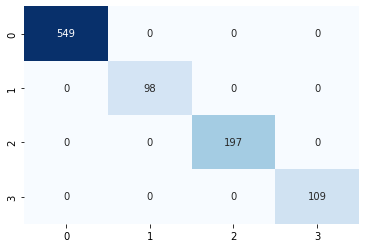

In [51]:
# confusion matrix - train set
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, fmt='d', cmap="Blues", cbar=False);

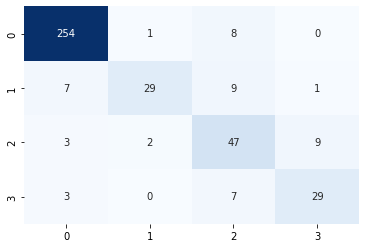

In [52]:
# confusion matrix - test set
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues", cbar=False);

## Retrain on entire dataset


In [138]:
final_classifier=CatBoostClassifier(depth= 7, iterations=500, learning_rate= 0.1)
final_classifier.fit(X,y)

0:	learn: 1.2506864	total: 4.4ms	remaining: 2.19s
1:	learn: 1.1432559	total: 7.9ms	remaining: 1.97s
2:	learn: 1.0590867	total: 11.6ms	remaining: 1.92s
3:	learn: 0.9767068	total: 15.8ms	remaining: 1.96s
4:	learn: 0.9112932	total: 19.3ms	remaining: 1.91s
5:	learn: 0.8602806	total: 22.7ms	remaining: 1.87s
6:	learn: 0.8151182	total: 26.3ms	remaining: 1.85s
7:	learn: 0.7750049	total: 29.9ms	remaining: 1.84s
8:	learn: 0.7388050	total: 33.3ms	remaining: 1.82s
9:	learn: 0.7072777	total: 36.9ms	remaining: 1.81s
10:	learn: 0.6746564	total: 40.4ms	remaining: 1.79s
11:	learn: 0.6476936	total: 44ms	remaining: 1.79s
12:	learn: 0.6197067	total: 47.5ms	remaining: 1.78s
13:	learn: 0.5965018	total: 51.1ms	remaining: 1.77s
14:	learn: 0.5739437	total: 54.6ms	remaining: 1.77s
15:	learn: 0.5598125	total: 58ms	remaining: 1.75s
16:	learn: 0.5437537	total: 62.1ms	remaining: 1.76s
17:	learn: 0.5272761	total: 66.4ms	remaining: 1.78s
18:	learn: 0.5132139	total: 70.1ms	remaining: 1.77s
19:	learn: 0.5010774	total: 

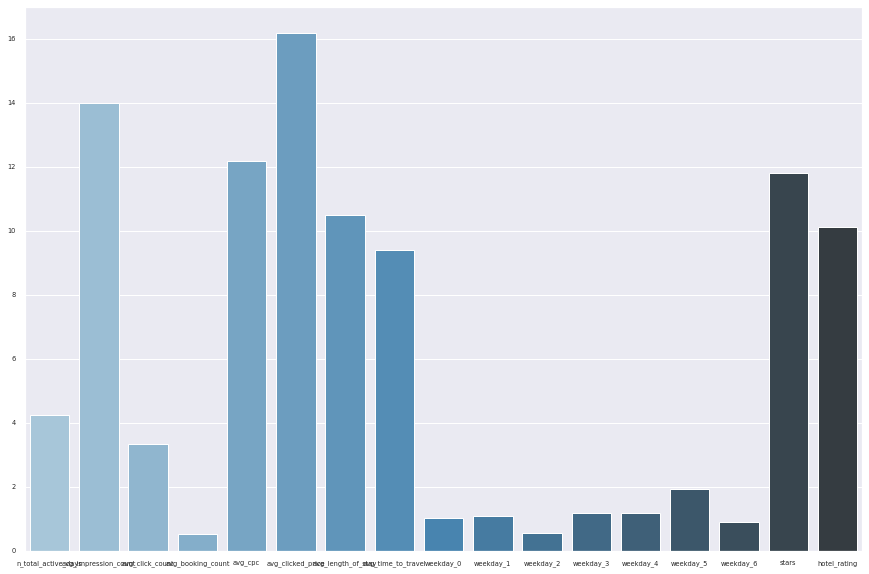

In [153]:
# feature importance
sns.set(rc={'figure.figsize':(15,10)})
sns.set(font_scale=0.6)
sns.barplot(x=X_train.columns, y=final_classifier.feature_importances_, palette="Blues_d");

In [193]:
# Final country predictions
pred_set['predicted_country']=final_classifier.predict(pred_set)
final_df=pred_set[['predicted_country']]
final_df

predicted_country
hotel_id                   
7931                      1
7932                      1
7938                      1
7960                      1
7964                      1
...                     ...
8378996                   1
8885418                   1
9771628                   1
10756876                  1
12122442                  1

[162 rows x 1 columns]

In [196]:
reverse_dicti={v: k for k, v in dicti.items()}
final_df=final_df.replace({"predicted_country": reverse_dicti})
final_df

predicted_country
hotel_id                  
7931                   USA
7932                   USA
7938                   USA
7960                   USA
7964                   USA
...                    ...
8378996                USA
8885418                USA
9771628                USA
10756876               USA
12122442               USA

[162 rows x 1 columns]

In [197]:
final_df.to_csv('III_country_predictions.csv')

# Part 4 -- logic of the model and the workflow 

As one can observe, the proposed model is trained on aggregated (in case of metrics we just calculated the mean for) 10-day dataset. The following design of the training mechanism has certain good reasons -- according to my observation -- more than a half of all hotels lack recorded data for each of the 10 first days of August 2019, out of which many hotels have temporal gaps in logging of the metrics --> which I interpreted (assumed to be) as a systemic signaling of the hotels' lack of activity on the platform during given days (i.e. all the metrics = 0). Given such an assumption I decided to generate 2 sets of features that would allow to add extra info on the hotels proactiveness on the platform given their lack/abundance of presence on the website. 

1) I created 7 dummy variables for each of 7 weekdays that would contain 1 if a hotel had registered interaction with the website at a given weekday. The idea behind these features was to see if proneness of a hotel to be active (or not) on a given weekday could increase the predictive power of the classifier by identifying with higher accuracy a country of origin (Hypothesis: may be some countries demonstrate cultural peculiarities in workday structure that could potentially be captured by our model, aka - Shabat-Saturdays in Israel, Fridays in Muslim-majority states and Sundays in Christian-majority states).

2) Second engineered feature: total number of days out of 10 recorded days a given hotel has been active on the website -- the idea is similar to the previous one -- quite possibly the country of origin might be inferred by the model more effectively by being trained to find patterns in hotels' activation frequencies in context of arbitrary n day-periods. 

Finally, we also included stars and hotel rating as our final features of the model. Given there are NaN values in hotel rating we decided not to fill the blank spaces with semi-arbitrary values that could interfere with model's performance and/or loose data --> instead we utilized wonderful property of tree-based model -- Gradient Boosting -- CatboostClassifier, that allows the input to contain NaN. The choice of gradient boosting model could also be considered as a relatively expected one, given its already well-established higher performance comparing to other tree-based algorithms (RT, DT...).

Having structurally committed to n (10) day data window in model training and having observed rather strong seasonality in clicks (aka in general in hotel searches -- during winters and summers users seem to exhibit the highest traveling willingness) I would suggest to have iterative model retraining with input data being constrained in similar 10 (<30) day windows, in frames of which we could easily aggregate the metrics by calculating the mean, as was done above. This way we would certainly avoid reducing the seasonal effects, taking into consideration each individual timeframe's systemic peculiarities. If daily updating is expected -- the day-by-day windows would be intersecting OR we could utilize the same model for exactly n days and retrain it after the n days pass with most relevant data. The latter suggestion seems to be more viable, given less need for cimputational power utilization and, given that a model that was trained just few days ago on rather similar data should not perform significantly worth in real life (expected accuracy ~=88%, given we have UNBALANCED data -- let's observe the f1 scores for each country above, which range from 0.71 to 0.96 on test set! --> we expect similar results in field application).

Hence, the task of classifing unlabeled hotels to a certain country would be done by a rather simple 500 iteration, depth=7 Catboost model, that would be trained from scratch on most up-to-date data that was gathered on past 10 days at every iteration (as we said it seems that daily retraining would be a bit excessive and redundant). That being said, we are going to retrain the model every n (10) days, before which the previous iteration of the model would be used to assign labels. VERY IMPORTANT -- after the hotels with unknown country were assigned a given label, in our DB, in the table hotel_details we must create a new dummy indicator (column) that would signal if a given hotel was assigned the country-label by our model at some point, in order to EXCLUDE that hotel from the training set in the future, so that the model does not inherit on its innate error. Hence, the model should be trained only on the hotels that had prior country association. In the flowchart below we accumaulate all the information described above in a more concise manner.




![alt text](image1.png)